In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
loan_original = pd.read_csv(r"C:\Users\Tamma\Desktop\PGD ML & AI\Module 7 Lending Club Case Study Assignment\loan\loan.csV")
pd.set_option("display.max_columns",None)
loan_original#.describe()

loan = loan_original
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
loan.shape

(39717, 111)

#### Checking columns with more than 50% of null values


(array([53.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0., 56.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

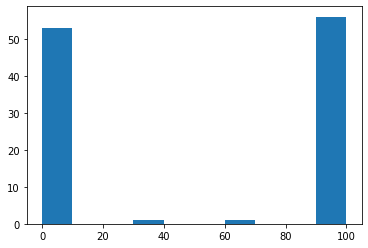

In [7]:
null_per = round((loan.isna().sum(axis=0)/len(loan.any(axis=1)))*100,2)
plt.hist(null_per)

In [8]:
null_per = round((loan.isna().sum(axis=0)/len(loan.any(axis=1)))*100,2)
null_per.loc[null_per<50]

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

<p> There is a huge number columns which contains 100% null values.<br>Also there are some columns having around 30-40% and 60-70% null values. <br>Let's remove which are more than 50% as these won't give us much relevent output

In [9]:
morethan50 = null_per.loc[null_per>50]
#type(morethan50)
morethan50
#morethan50['frequeny'] = np.arange(len(loan.any(axis=1)))


mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [10]:
extra_null_columns = list(morethan50.index)
extra_null_columns

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [11]:
loan = loan.drop(extra_null_columns,axis=1) #running it again will give error as there will nothing to drop

In [12]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidat

#### Since 'loan_amnt' and 'funded_amnt' have exact similar values, let's check the correlation

In [13]:
#loan['loan_amnt'].corr(loan['funded_amnt'],method='pearson')

## Let's drop one column out of the two. Correlattion is not 1 thus there are some of rows where values are not matched

In [14]:
#loan = loan.drop('funded_amnt',axis=1)

In [15]:
loan['id'].nunique() #all the id's are unique

39717

In [16]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
#plt.hist(loan['loan_amnt'])
#plt.xlabel("loan_amnt")
#plt.ylabel("Frequency")
#plt.show()

In [18]:
loan.loc[loan['loan_status'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [19]:
fully_paid = loan.loc[loan['loan_status']=='Fully Paid']
fully_paid.shape

(32950, 54)

In [20]:
charged_off = loan.loc[loan['loan_status']=='Charged Off']
charged_off.shape

(5627, 54)

In [21]:
current = loan.loc[loan['loan_status']=='Current']
current.shape

(1140, 54)

In [22]:
fully_paid.shape[0]+charged_off.shape[0]+current.shape[0] #looks Fine

39717

In [23]:
p_ex =  loan.pivot_table(index='loan_status', values='annual_inc',columns='verification_status')
p_ex

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,55583.202792,60708.453082,70776.822984
Current,57811.267841,74307.980645,82640.673997
Fully Paid,61908.732801,69592.399972,81479.414276


In [24]:
loan['pymnt_plan'].unique()

array(['n'], dtype=object)

In [25]:
loan['initial_list_status'].unique()

array(['f'], dtype=object)

### <font color="red">There is nothing other than "n" in pymnt_plan and in 'initial_list_status' other than 'f'.Better to remove them.

In [26]:
loan['term'].unique() #months be to be removed

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [29]:
loan['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [30]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [31]:
loan['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [32]:
loan['inq_last_6mths'].unique()

array([1, 5, 2, 0, 3, 4, 6, 7, 8], dtype=int64)

In [33]:
loan['pub_rec'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [34]:
loan['out_prncp'].unique()

array([   0.  ,  524.06, 1849.1 , ...,   19.12,   13.28,   79.24])

In [35]:
loan['out_prncp_inv'].unique()

array([   0.  ,  524.06, 1844.43, ...,   19.09,   13.28,   79.24])

### <font color ="red">'out_prncp' and 'out_prncp_inv' are having similar values. drop one of them

In [36]:
loan['out_prncp'].corr(loan['out_prncp_inv'],method='pearson')

0.9998274655132868

In [37]:
loan['total_rec_late_fee'].unique()

array([ 0.        , 16.97      , 15.00000003, ...,  1.69      ,
        1.36      , 19.89      ])

In [38]:
loan['recoveries'].unique()

array([  0.  , 117.08, 189.06, ..., 304.2 ,  35.7 ,  21.29])

In [39]:
loan['collection_recovery_fee'].unique()

array([0.0000e+00, 1.1100e+00, 2.0900e+00, ..., 6.6836e+02, 4.4425e+02,
       2.3000e-01])

In [40]:
loan['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [41]:
loan['policy_code'].unique()

array([1], dtype=int64)

In [42]:
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [43]:
loan['acc_now_delinq'].unique()

array([0], dtype=int64)

In [44]:
loan['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [45]:
loan['delinq_amnt'].unique()

array([0], dtype=int64)

In [46]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [47]:
loan['tax_liens'].unique()

array([ 0., nan])

Columns with values "n" and "f" and columns with values 0 and NAN do not contribute to our Analysis as there is no impact of these values.<br>
Let's Drop them too

In [48]:
faltu_columns = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [49]:
loan = loan.drop(faltu_columns,axis=1) #don't run again

In [50]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00

Desc, Url and columns related to customer address doesn't contribute to the analysis

In [51]:
loan = loan.drop(['desc','zip_code','addr_state','id','member_id','url'],axis=1)

In [52]:
loan.loc[loan['loan_status'].isna()]#no

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [53]:
(loan['emp_length'].isna().sum()/len(loan.any(axis=1)))*100

2.7066495455346575

In [54]:
(loan.isna().sum()/len(loan.any(axis=1)))*100#.count()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0

In [55]:
new_emp_len = {
    '< 1 year' : 0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10
}

In [56]:
loan['emp_length']= loan['emp_length'].replace(new_emp_len)

In [57]:
loan['emp_length']= loan['emp_length'].astype('float')

In [58]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,0.0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,0.0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


Removed the rows where values are null

In [59]:
loan = loan.loc[~loan['emp_length'].isna()]


In [60]:
loan = loan.loc[~loan['emp_title'].isna()]

In [61]:
miss = round((loan.isna().sum(axis=0)/len(loan['emp_length']))*100,2)
miss.loc[miss>0]

title                   0.02
revol_util              0.12
last_pymnt_d            0.17
pub_rec_bankruptcies    1.76
dtype: float64

In [62]:
loan = loan.loc[~loan['title'].isna()]
loan = loan.loc[~loan['revol_util'].isna()]
loan = loan.loc[~loan['last_pymnt_d'].isna()]
loan = loan.loc[~loan['pub_rec_bankruptcies'].isna()]

In [63]:
loan.isna().sum(axis=0)

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

In [64]:
loan['term'] = loan['term'].str.slice(stop=3).astype('float')
loan#['term'].dtype

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60.0,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36.0,7.90%,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91%,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.50%,4,0.00,0.00,14370.922250,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28%,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.70%,12,0.00,0.00,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49%,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.90%,37,0.00,0.00,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22%,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.30%,29,0.00,0.00,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [65]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype(float)
loan['revol_util'] = loan['revol_util'].str.strip('%').astype(float)

In [66]:
loan['total_pymnt'] = round(loan['total_pymnt'],2)

In [67]:
#loan['issue_d'] = pd.to_datetime(loan['issue_d'],errors='ignore')

In [68]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.5,4,0.00,0.00,14370.92,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.7,12,0.00,0.00,5134.09,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.9,37,0.00,0.00,4015.96,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.3,29,0.00,0.00,11652.75,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0



# Data_Cleaning End:
### <font color="blue"> Now we have cleaned data to analize

In [69]:
c_data = loan #assigned this cleaned data to new object

In [70]:
c_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.5,4,0.00,0.00,14370.92,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.7,12,0.00,0.00,5134.09,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.9,37,0.00,0.00,4015.96,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.3,29,0.00,0.00,11652.75,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [71]:
(loan.any(axis=0).index)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [72]:
#fully_paid = c_data.loc[c_data['loan_status']=='Fully Paid']
#fully_paid.shape

In [73]:
#current = c_data.loc[c_data['loan_status']=='Current']
#current.shape

In [74]:
#charged_off = c_data.loc[c_data['loan_status']=='Charged Off']
#charged_off.shape

 
### <font color="red"> Loans which are still in process, not labeled as Default, Removing the rows where loan_status is Current

In [75]:
final_loan = c_data.loc[c_data['loan_status']!='Current']

In [76]:
final_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36.0,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,5.35,0,Jan-07,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.5,4,0.0,0.0,14370.92,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.7,12,0.0,0.0,5134.09,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.9,37,0.0,0.0,4015.96,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.3,29,0.0,0.0,11652.75,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [77]:
final_loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,3.536700e+04,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.0,35367.0,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.00000,35367.000000
mean,11133.071790,10866.525999,10427.124106,42.100602,11.983468,324.043982,4.983544,6.909599e+04,13.403961,0.146323,0.866995,9.332004,0.054147,13367.676733,49.139015,22.209206,0.0,0.0,12020.407386,11544.554967,9766.376425,2157.070677,1.306102,95.654256,12.029025,2813.59290,0.041677
std,7326.233093,7069.586419,6968.341877,10.449890,3.702512,207.149088,3.537027,6.396705e+04,6.636540,0.493060,1.064434,4.374975,0.235734,15678.460397,28.228038,11.403045,0.0,0.0,8817.192499,8671.919254,6998.669475,2410.568245,7.090080,692.056592,142.972962,4521.49033,0.200560
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.01000,0.000000
25%,5500.000000,5500.000000,5000.000000,36.000000,8.940000,167.840000,2.000000,4.150000e+04,8.320000,0.000000,0.000000,6.000000,0.000000,3782.000000,25.900000,14.000000,0.0,0.0,5602.510000,5321.415000,4750.000000,662.235000,0.000000,0.000000,0.000000,224.78500,0.000000
50%,10000.000000,9600.000000,9000.000000,36.000000,11.830000,280.620000,4.000000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,0.000000,8934.000000,49.700000,21.000000,0.0,0.0,9865.710000,9395.310000,8000.000000,1331.960000,0.000000,0.000000,0.000000,602.58000,0.000000
75%,15000.000000,15000.000000,14300.000000,60.000000,14.460000,426.640000,9.000000,8.250000e+04,18.640000,0.000000,1.000000,12.000000,0.000000,17064.500000,72.600000,29.000000,0.0,0.0,16300.485000,15619.810000,13500.000000,2722.910000,0.000000,0.000000,0.000000,3604.44500,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.20000,2.000000


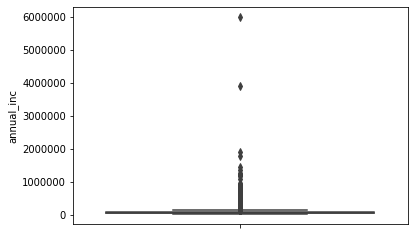

In [78]:
sb.boxplot(y=final_loan['annual_inc'])
#clearly there are 2 outliers

In [79]:
final_loan['annual_inc'].describe()
final_loan['annual_inc'].mean() #69095.985
final_loan['annual_inc'].median() #60000
final_loan['annual_inc'].max() #6000000

6000000.0

In [80]:
np.quantile(final_loan['annual_inc'],.99)

230000.0

In [81]:
np.percentile(final_loan['annual_inc'],99)

230000.0

In [82]:
temp = final_loan.loc[final_loan['annual_inc']>np.quantile(final_loan['annual_inc'],.99)]
temp
#temp.loc[temp['loan_status']=='Fully Paid'].sort_values(by='annual_inc',ascending=False)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
392,5000,5000,5000.000000,36.0,6.62,153.52,A,A2,STRAIGHT LINE LOGISTICS,1.0,RENT,276000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,DEBT CONSOLIDATION STRATEGY,1.82,0,Jun-04,0,7,0,15175,56.0,18,0.0,0.0,5526.66,5526.66,5000.00,526.66,0.0,0.00,0.0000,Jan-15,166.04,Dec-14,0.0
567,2000,2000,2000.000000,36.0,9.91,64.45,B,B1,Comcast,1.0,MORTGAGE,231252.0,Source Verified,Dec-11,Fully Paid,other,Loan to Fix Carpet,11.43,0,Mar-80,0,19,0,46267,93.5,43,0.0,0.0,2320.20,2320.20,2000.00,320.20,0.0,0.00,0.0000,Dec-14,67.24,May-16,0.0
717,28000,28000,28000.000000,36.0,15.96,983.85,C,C5,Blank Rome LLP,5.0,MORTGAGE,235000.0,Source Verified,Dec-11,Fully Paid,credit_card,Credit Card Loan,9.08,0,Jul-94,1,10,0,18287,82.7,27,0.0,0.0,34735.37,34735.37,28000.00,6735.37,0.0,0.00,0.0000,Feb-14,10164.77,Mar-14,0.0
836,35000,22875,22875.000000,60.0,19.03,593.77,E,E2,Ernst & Young LLP,4.0,MORTGAGE,235000.0,Verified,Dec-11,Charged Off,credit_card,Debt Consolidation,14.08,0,Jul-92,0,13,0,42936,83.8,31,0.0,0.0,19075.97,19075.97,6337.11,7318.78,0.0,5420.08,921.4136,Dec-13,31.28,May-16,0.0
1210,12000,12000,12000.000000,36.0,6.03,365.23,A,A1,L-3 Communications,6.0,MORTGAGE,243600.0,Verified,Dec-11,Fully Paid,medical,Medical,6.45,0,Mar-96,0,8,0,38357,19.7,18,0.0,0.0,13148.14,13148.14,12000.00,1148.14,0.0,0.00,0.0000,Dec-14,369.48,Dec-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38048,15000,15000,7395.946020,36.0,14.42,515.74,D,D2,Loehmann's,0.0,OTHER,244000.0,Verified,Dec-08,Fully Paid,debt_consolidation,Lending Club Debt Consolidate,20.01,0,Dec-88,1,24,0,77179,82.5,41,0.0,0.0,18566.58,8537.28,14999.99,3566.59,0.0,0.00,0.0000,Dec-11,535.09,Dec-11,0.0
38177,10000,10000,2696.445935,36.0,13.67,340.18,D,D2,Bristol-Myers Squibb Company,2.0,RENT,250000.0,Not Verified,Nov-08,Fully Paid,debt_consolidation,Clear Visa Wachovia,10.51,0,Dec-97,2,8,0,89156,99.2,19,0.0,0.0,12246.42,3199.10,10000.00,2246.42,0.0,0.00,0.0000,Dec-11,342.29,Mar-12,0.0
38320,6000,6000,4700.000000,36.0,11.46,197.75,B,B5,Fortis Bank,2.0,RENT,240000.0,Verified,Oct-08,Fully Paid,other,Need to Help a Friend,3.64,0,Jan-00,0,4,0,58753,94.0,11,0.0,0.0,6782.68,5313.10,6000.00,782.68,0.0,0.00,0.0000,Apr-10,3624.09,Apr-13,0.0
38322,15000,15000,4122.677661,36.0,12.41,501.16,C,C3,"Fluid Surf II, Inc",1.0,RENT,350000.0,Not Verified,Oct-08,Charged Off,small_business,Operations and Expansion Loan,5.86,0,Feb-02,2,13,0,36073,72.9,24,0.0,0.0,4005.55,1097.50,1405.17,598.63,0.0,2001.75,700.7200,Mar-09,501.16,May-16,0.0


There are 34 people who have higher salary above 230000 but couldn't pay off the loan and 311 people with salary above 230000 who have paid the loan.

Since 230000 comed under the 99%, Let's remove these outliers as there are less in numbers.

In [83]:
final_loan = final_loan.loc[final_loan['annual_inc']<=np.quantile(final_loan['annual_inc'],.99)] #don't run it again

In [84]:
fully_paid = final_loan.loc[final_loan['loan_status']=='Fully Paid']
fully_paid.shape

(30113, 39)

In [85]:
charged_off = final_loan.loc[final_loan['loan_status']=='Charged Off']
charged_off.shape

(4909, 39)

In [86]:
final_loan['loan_status'] = final_loan['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)
final_loan

C:\Users\Tamma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,1,car,bike,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,0,other,personel,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36.0,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Dec-11,0,car,Car Downpayment,5.35,0,Jan-07,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,0,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.5,4,0.0,0.0,14370.92,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,0,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.7,12,0.0,0.0,5134.09,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,1,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.9,37,0.0,0.0,4015.96,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,1,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.3,29,0.0,0.0,11652.75,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


##  Univariate

## <font color="red"> 0 indicated Fully Paid and 1 indicates Charged off

In [87]:
#plt.hist(final_loan['loan_status'])
#plt.xlabel("loan_status")
#plt.ylabel("Frequency")
#plt.yscale('log')

In [88]:
final_loan['loan_amnt'].corr(final_loan['installment'])

#loan_amnt and installment is very positively correleted
#more the person has taken the loan , more the installment amount will be.

0.9301897398659593

Text(0, 0.5, 'Frequency')

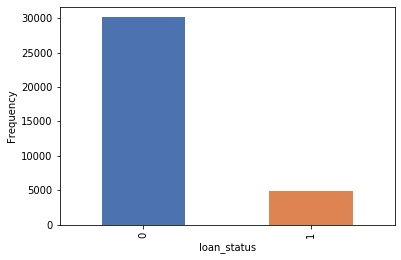

In [89]:
final_loan.groupby('loan_status').loan_amnt.count().plot.bar(color=sb.color_palette('deep', 16)) #unordered Categorical
plt.xlabel("loan_status")
plt.ylabel("Frequency")

### <font color="green">Above graphical representation clearly shows that there are more number of people who have paid the full amount incluidng intereset.

Text(0, 0.5, 'Frequency')

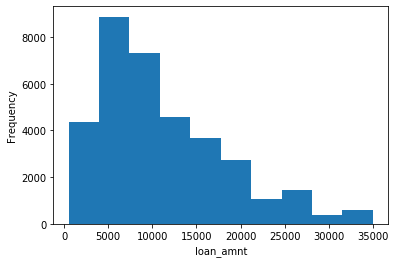

In [90]:
plt.hist(final_loan['loan_amnt'])
plt.xlabel("loan_amnt")
plt.ylabel("Frequency")
#sb.color_palette('hls',3)

Most of the people have taken loan in the range of 5000 to 10000

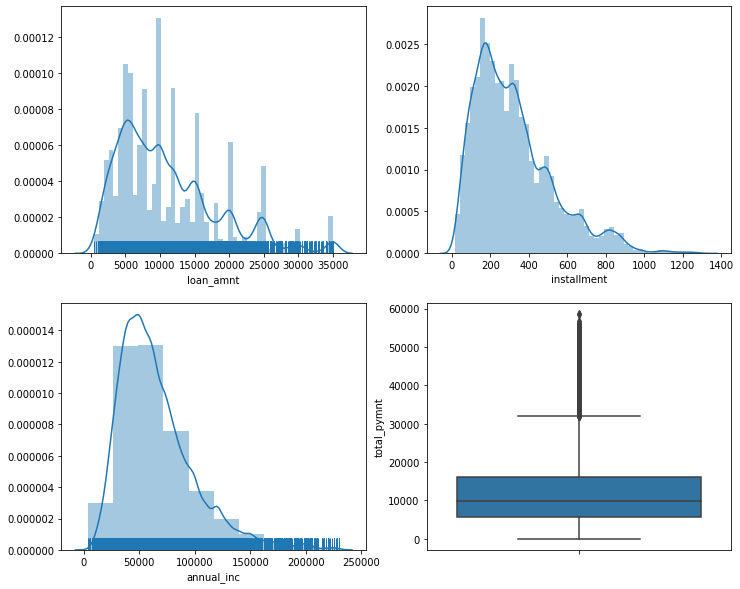

In [117]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sb.distplot(final_loan['loan_amnt'], rug=True) #order categorical

plt.subplot(2,2,2)
sb.distplot(final_loan['installment']) #order categorical

plt.subplot(2,2,3)
sb.distplot(final_loan['annual_inc'],bins=10,rug=True) #order categorical

plt.subplot(224)
sb.boxplot(y=final_loan['total_pymnt'])

In [92]:
# very large number of people (fully_paid + charged_off) has annual income till in range of around 10k to 60k

Text(0.5, 1.0, 'total_pymnt')

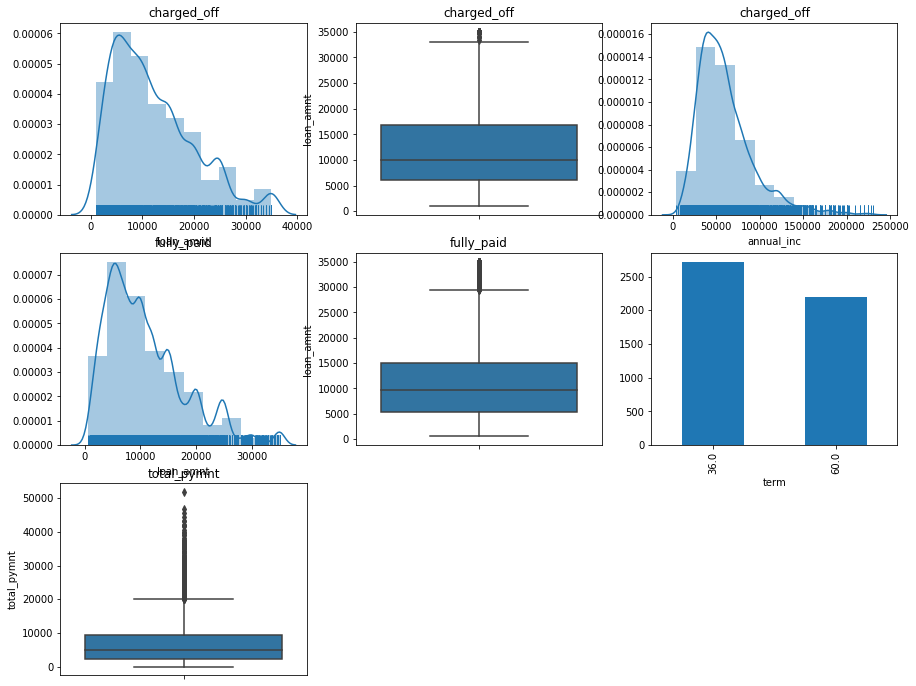

In [126]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sb.distplot(charged_off['loan_amnt'],rug=True,bins=10) #order categorical
plt.title('charged_off')

plt.subplot(332)
sb.boxplot(y=charged_off['loan_amnt'])
plt.title('charged_off')



plt.subplot(333)
sb.distplot(charged_off['annual_inc'],rug=True,bins=10) #ordered Categorical
plt.title('charged_off')


plt.subplot(334)
sb.distplot(fully_paid['loan_amnt'],rug=True,bins=10)
plt.title('fully_paid')

plt.subplot(335)
sb.boxplot(y=fully_paid['loan_amnt'])
plt.title('fully_paid')

plt.subplot(336)
charged_off.groupby('term').loan_amnt.count().plot.bar() #segmented univariate

plt.subplot(337)
sb.boxplot(y=charged_off['total_pymnt'])
plt.title('total_pymnt')

On an average people have taken loan around 10k as shown in the boxplot (charged off_fully paid) but people who are charged have more taken larger loan_amnt compared to ones who are fully paid as shown in boxplot that the 75% quartile range is greater than 15k for people who are charged

Most People who are charged off are taking annual  income of ranging from 25k to near about 70k PA.<br>

Total Amount received for people charged off is very less as expected

Text(0.5, 1.0, 'annual income of charged')

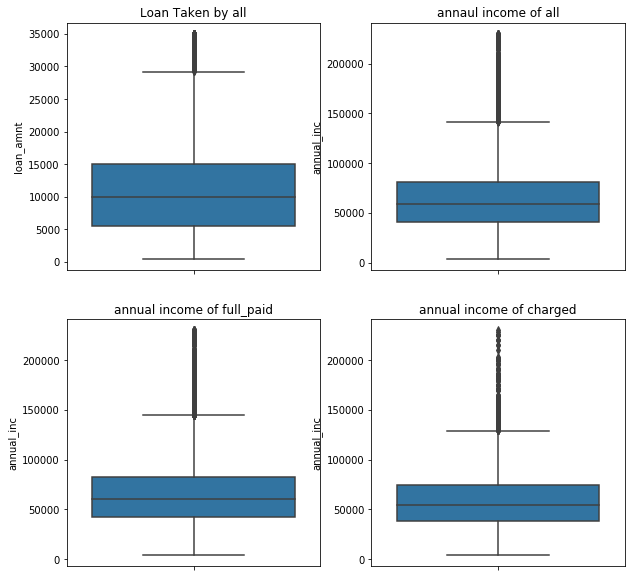

In [127]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sb.boxplot(y=final_loan['loan_amnt'])
plt.title("Loan Taken by all")

plt.subplot(222)
sb.boxplot(y=final_loan['annual_inc']) #including fully_paid and charged_off
#plt.yscale('log')
plt.title('annaul income of all')

plt.subplot(223)
sb.boxplot(y=fully_paid['annual_inc'])
plt.title("annual income of full_paid")
#plt.yscale('log')


plt.subplot(224)
sb.boxplot(y=charged_off['annual_inc'])
plt.title("annual income of charged")

Poeple who have fully the amount and people who have charged_off have almost similar annual_incme but with slighty differnce.

Also above BoxPlots says there are some people who have more than 100000 anuual income still unable to pay back the loan on due dates.<br>




## Segmented

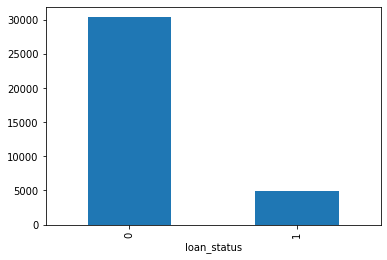

In [364]:
final_loan.groupby('loan_status').recoveries.count().plot.bar()

Text(0, 0.5, 'annual_inc')

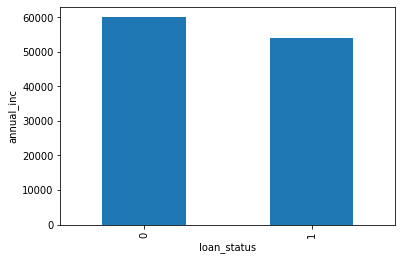

In [368]:
final_loan.groupby('loan_status').annual_inc.median().plot.bar()
plt.ylabel('annual_inc')

There is no much difference between the average salary of people who have paid the full amount and people who are charged

In [319]:
final_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,1,car,bike,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,0,other,personel,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36.0,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Dec-11,0,car,Car Downpayment,5.35,0,Jan-07,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36.0,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,0,debt_consolidation,no credit cards for me,9.23,0,Dec-00,0,4,1,13126,96.5,4,0.0,0.0,14370.92,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36.0,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,0,debt_consolidation,Want to pay off high intrest cards,7.51,0,Mar-00,0,11,1,5836,68.7,12,0.0,0.0,5134.09,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36.0,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,1,debt_consolidation,Pay off debt,5.08,0,Aug-97,3,9,1,26233,62.9,37,0.0,0.0,4015.96,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36.0,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,1,debt_consolidation,paying credit cards and doctor bill.,13.50,0,Nov-92,3,13,1,6513,34.3,29,0.0,0.0,11652.75,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


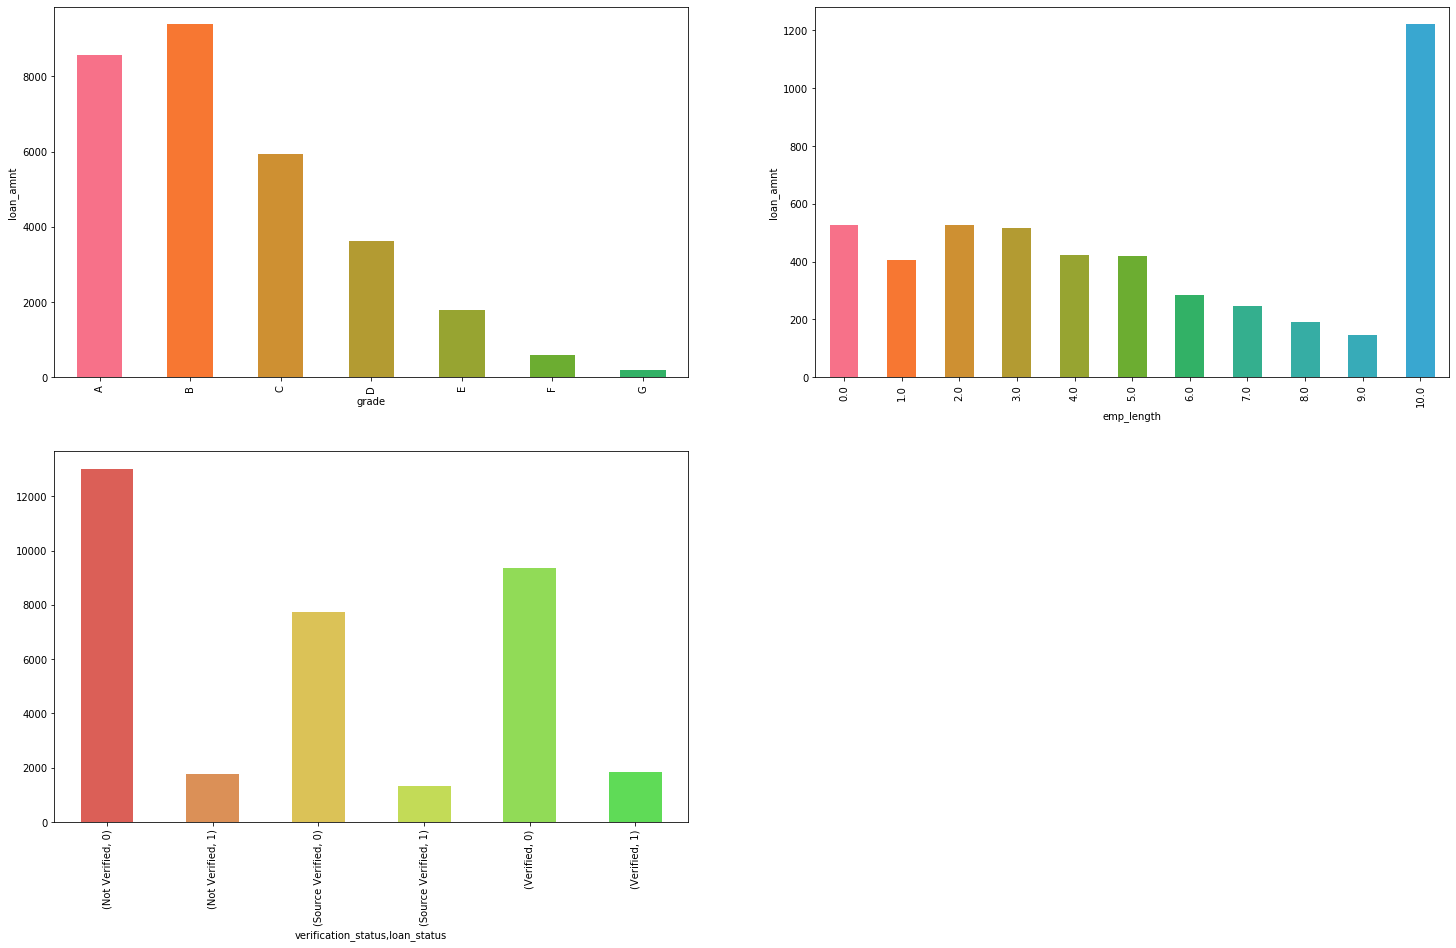

In [134]:
plt.figure(figsize=(25,15))

plt.subplot(221)
fully_paid.groupby('grade').loan_amnt.count().plot.bar(color=sb.color_palette('husl', 16))
plt.ylabel('loan_amnt')
#plt.xlabel('grade',fontsize=34)

plt.subplot(222)
charged_off.groupby('emp_length').loan_amnt.count().plot.bar(color=sb.color_palette('husl', 16))
plt.ylabel('loan_amnt')

plt.subplot(223) # Biavariate
final_loan.groupby(['verification_status','loan_status']).loan_status.count().plot.bar(color=sb.color_palette('hls', 16))

#plt.subplot(224)
#sb.boxplot(y=charged_off['annual_inc'])#.plot.bar()
#sb.color_palette('husl', 16)

People who are chrged have taken mostly B grade or C grade type of loan  <br>
People who are charged have 10 years of employment length<br>
Most of the income source of people either not verified which can be a major risk of profit as the income proof given by borrower can be fake thus resulting in the borrower being defaulted.

Text(0, 0.5, 'annual_amnt')

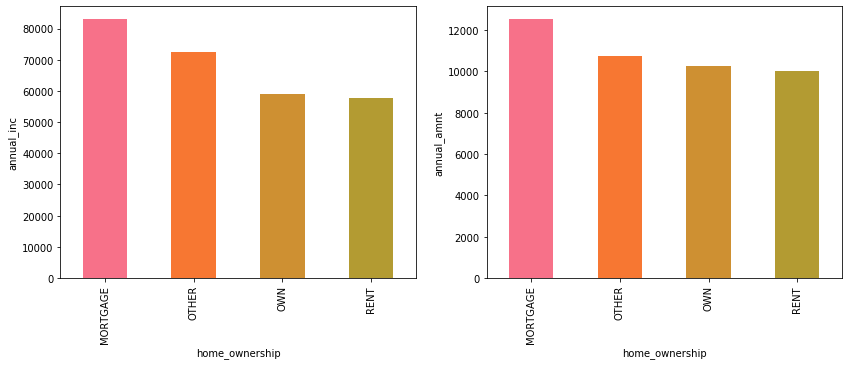

In [432]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
final_loan.groupby('home_ownership').annual_inc.mean().plot.bar(color=sb.color_palette('husl', 16))
plt.ylabel('annual_inc')

plt.subplot(122)
final_loan.groupby('home_ownership').loan_amnt.mean().plot.bar(color=sb.color_palette('husl', 16))
plt.ylabel('annual_amnt')

People having higher annual income have home_ownership as "MORTGAGE"

Similarly people having higher annual incme have taken higher amount of loan<br>


Text(0, 0.5, 'Loan_amnt')

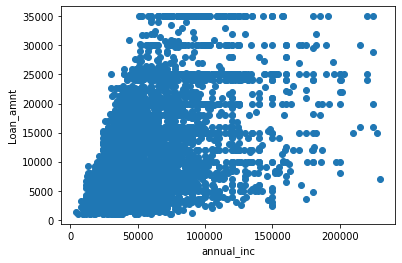

In [136]:
plt.scatter(charged_off['annual_inc'],charged_off['loan_amnt'])
plt.xlabel("annual_inc")
plt.ylabel("Loan_amnt")

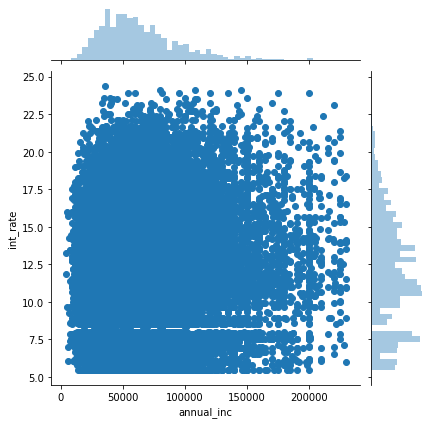

In [135]:
sb.jointplot('annual_inc','int_rate',final_loan)

In [527]:
### <font color='red'>This shows only 2 people have more than 20 lacks anuual income 

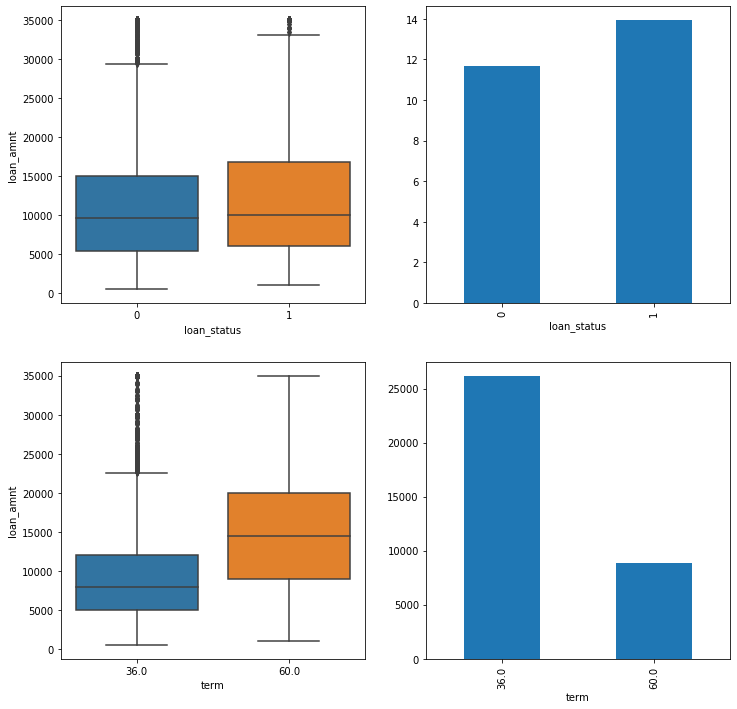

In [137]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sb.boxplot(final_loan['loan_status'],final_loan['loan_amnt'])
#plt.yscale('log')

#subplot2
plt.subplot(2,2,2)
final_loan.groupby('loan_status').int_rate.mean().plot.bar()

#sb.boxplot(final_loan['grade'],final_loan['loan_amnt'])

plt.subplot(2,2,3)
sb.boxplot(final_loan['term'],final_loan['loan_amnt'])

plt.subplot(2,2,4)
final_loan.groupby('term').loan_amnt.count().plot.bar()
#plt.bar(final_loan['loan_status'],final_loan['installment'])
plt.show()

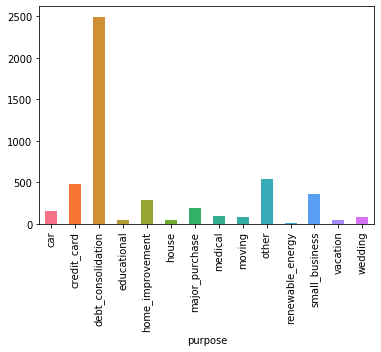

In [142]:
charged_off.groupby('purpose').loan_status.count().plot.bar(color=sb.color_palette('husl', 16))

In [393]:
# Higher number of loan are taken with term of 36 months which can lead to Risk of borrower not pay back the money

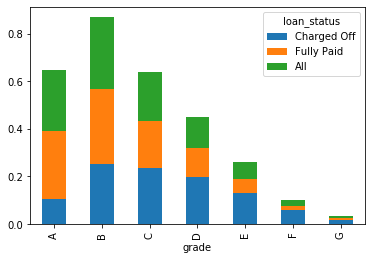

In [561]:
some = pd.crosstab(final_loan['grade'],final_loan['loan_status'],margins=True,normalize='columns')
some.plot.bar(stacked=True)

More number of loan are taken for 36 months and average loan taken for 36 mnths is approx 7500 and for 

In [126]:
p_ex =  final_loan.pivot_table(index='loan_status', values='annual_inc')
p_ex

,annual_inc
loan_status,
Charged Off,63019.486686
Fully Paid,70083.236679


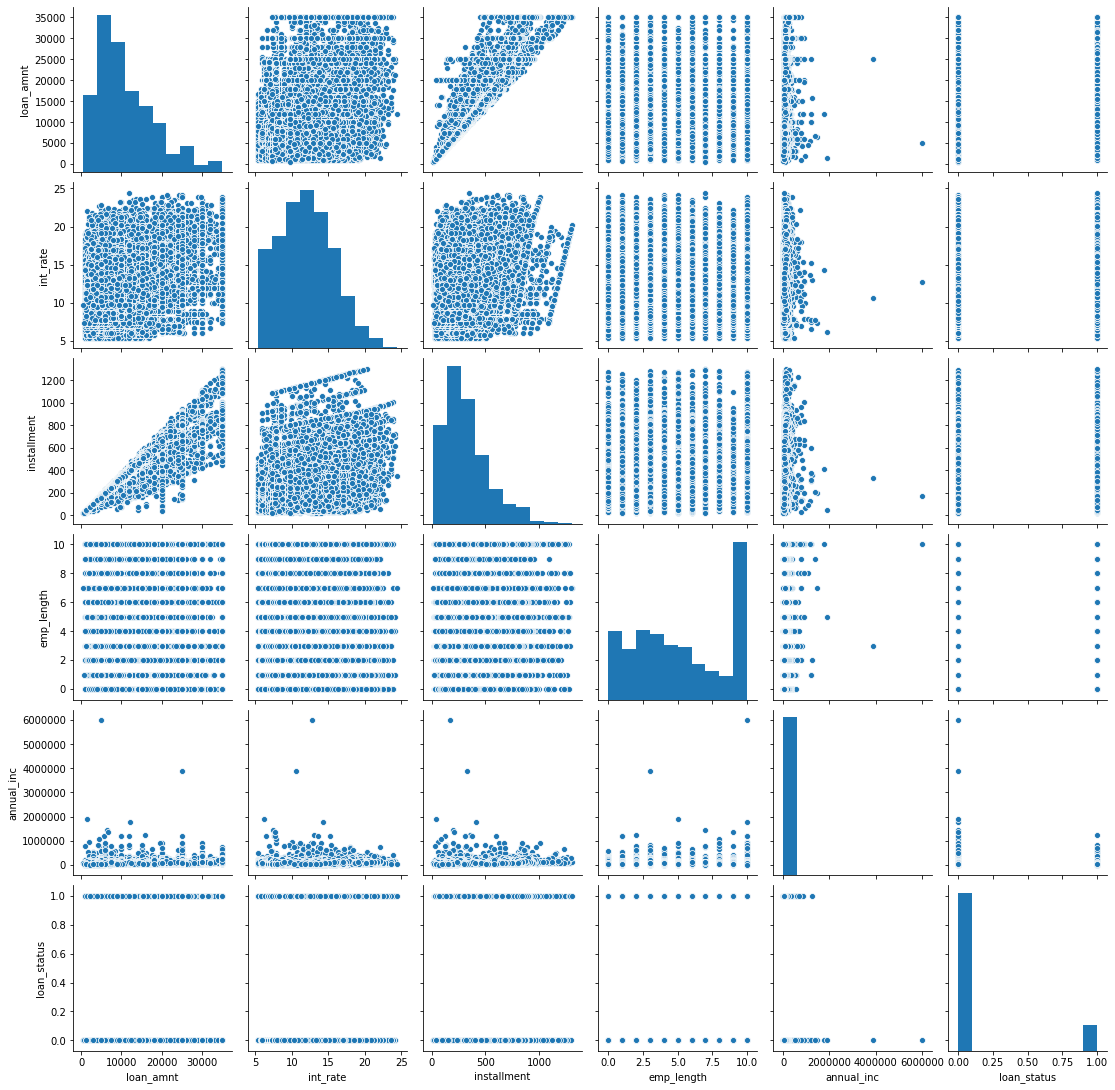

In [437]:
sb.pairplot(final_loan[['loan_amnt','int_rate','installment','emp_length','annual_inc','loan_status']])

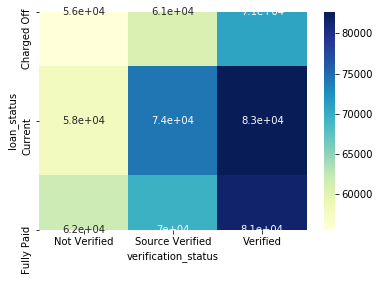

In [139]:
sb.heatmap(p_ex,cmap='YlGnBu',annot=True)